In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20190103/


In [3]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'BCPairwiseCorrs'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 4.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

In [4]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
Nreps = 20
skip = 100
dur = 120000.0
nwins = 1200
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs/20190103T210925Z-10.0-5.0.binned
Data Not already binned
Nreps = 20
skip = 156
dur = 206722.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206723.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206722.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206718.0
nwins = 1325
Nreps = 20
skip = 156
dur = 206719.0
nwins = 1325
Nreps = 20
skip = 156
dur = 20671

In [5]:
def compute_betti_data(bird):
    betti_data = {}
    betti_data[bird] = {}
    bdf = bdfs[bird]
    block_path = bps[bird]

    # Compute the betti curves for the original data
    # bc
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                             thresh, nperms, ncellsperm,
                                             dims, twin, windt, dtovr, shuffle=False)
    betti_data[bird]['bc'] = bc
    betti_data[bird]['t'] = t
    betti_data[bird]['t_ms'] = t_ms

    # Compute the betti curves for shuffled-in-time data
    # This breaks the inter-neuronal coordination
    # suffix: s
    (bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=True)
    betti_data[bird]['bcs'] = bcs
    betti_data[bird]['ts'] = ts
    betti_data[bird]['ts_ms'] = ts_ms

    # Compute the betti curves for shuffled-in-trials data
    # suffix: st
    (bcst, tst, tst_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=tp2.shuffle_tensor_across_trials)
    betti_data[bird]['bcst'] = bcst
    betti_data[bird]['tst'] = tst
    betti_data[bird]['tst_ms'] = tst_ms

    # Compute the betti curves for shuffled-in-trials data
    # suffix: sts
    (bcsts, tsts, tsts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_across_trials_across_stims)
    betti_data[bird]['bcsts'] = bcsts
    betti_data[bird]['tsts'] = tsts
    betti_data[bird]['tsts_ms'] = tsts_ms

    # Compute the betti curves for shuffled-in-trials data, keeping cell spike trains intact
    # suffix: stss
    (bcstss, tstss, tstss_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_whole_spiketrains_across_stims)
    betti_data[bird]['bcstss'] = bcstss
    betti_data[bird]['tstss'] = tstss
    betti_data[bird]['tstss_ms'] = tstss_ms
    return betti_data

In [6]:
def build_betti_curve_tensor(betti_data, bird, shuffle_type='bc', betti=1, subtract_mean=False, normalize=False):
    '''
    Concatenates all betti curves into an (nstim*ntrial) x nsamples tensor
    '''
    betti_tensor = np.zeros((8*20,1000))
    bd = betti_data[bird][shuffle_type]
    stims = list(bd.keys())[0:8]
    for ind,stim in enumerate(stims):
        bc = bd[stim]
        if normalize:
            bc = normalize_betti_curves(bc)
        if subtract_mean:
            bc = subtract_mean_bc(bc)
        #print(bc.shape)
        for trial in range(20):
            betti_tensor[ind*20+trial, :] = bc[betti, :, trial]
    return betti_tensor

def compute_pairwise_cosine_similarity(betti_tensor):
    #bt = np.reshape(betti_tensor, (8*20,1000))
    bt = betti_tensor
    btnorms = np.sqrt(np.sum(bt**2, axis=1))
    btnorms = np.multiply.outer(btnorms, btnorms)
    #btsq = np.tensordot(bt, bt, axes=([1], [1]))
    btsq = np.dot(bt, bt.T) / 1000.
            
    return np.divide(btsq, btnorms)

def compute_pairwise_correlations(betti_tensor):
    return np.corrcoef(betti_tensor)
    

In [7]:
def compute_corr_distributions(betti_data, bird, shuffle_type, betti, subtract_mean=False, normalize=False):
    '''
    Compute the distributions of correlations between betti curves between stimuli and across stimuli
    '''
    btens = build_betti_curve_tensor(betti_data,bird, shuffle_type=shuffle_type, betti=betti, subtract_mean=subtract_mean, normalize=normalize)
    #cos_sim = compute_pairwise_cosine_similarity(btens)
    pairwise_correlations = compute_pairwise_correlations(btens)
    in_stim_corrs = []
    btwn_stim_corrs = []
    for stim in range(8):
        # Extract within-stimuli correlations
        stim_sim = pairwise_correlations[stim*20:(stim+1)*20, stim*20:(stim+1)*20]
        stim_sim_ut = stim_sim[np.triu_indices(20, 1)]
        in_stim_corrs.append(stim_sim_ut)
        
        # Extract between-stimuli correlations
        for stim2 in range(stim+1, 8):
            btwn_sim = pairwise_correlations[stim*20:(stim+1)*20, stim2*20:(stim2+1)*20].flatten()
            btwn_stim_corrs.append(btwn_sim)
    return (in_stim_corrs, btwn_stim_corrs)

In [8]:
stypes = ['bc', 'bcs', 'bcst', 'bcsts', 'bcstss']
import tqdm
bc_distrib_data = {}
for bird in birds:
    bc_distrib_data[bird] = {}
    for betti in [0,1,2]:
        bc_distrib_data[bird][betti] = {}
        for shuffle_type in stypes:
            bc_distrib_data[bird][betti][shuffle_type] = []
            
nreps = 1
for rep in tqdm.tqdm(range(nreps)):
    for bird in birds:
        betti_data = compute_betti_data(bird)
        #print(bird, betti_data.keys())
        for betti in [0, 1,2]:
            for shuffle_type in stypes:
                corr_distribs = compute_corr_distributions(betti_data, bird, shuffle_type, betti, subtract_mean=False, normalize=False)
                bc_distrib_data[bird][betti][shuffle_type] = corr_distribs
                
import pickle
with open(os.path.join(figsavepth, 'bc_correlation_distrib.pkl'), 'wb') as f:
    pickle.dump(bc_distrib_data, f)

  0%|          | 0/1 [00:00<?, ?it/s]/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_b

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


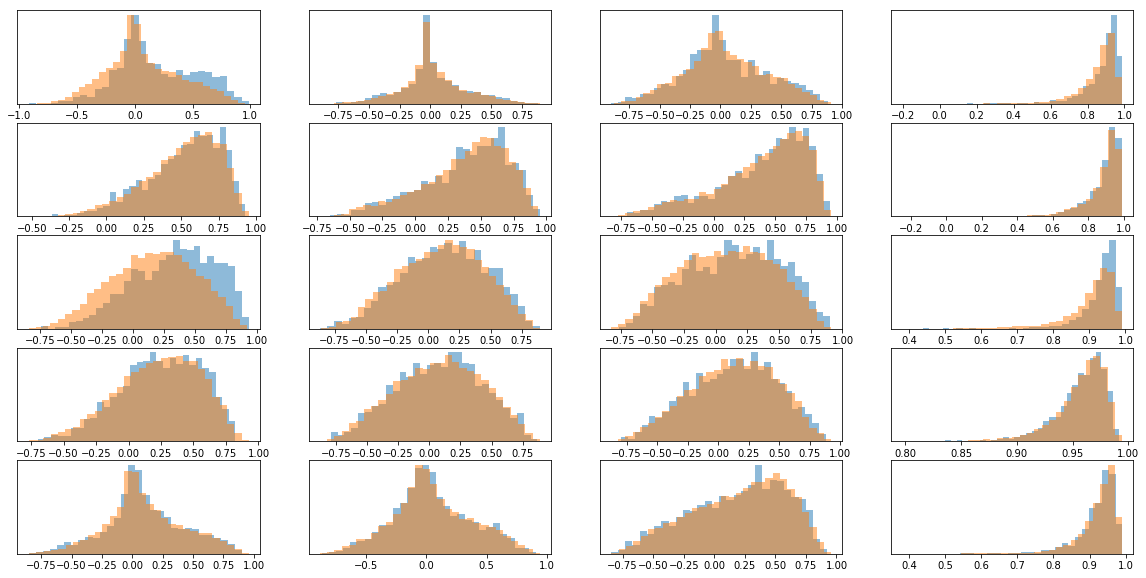

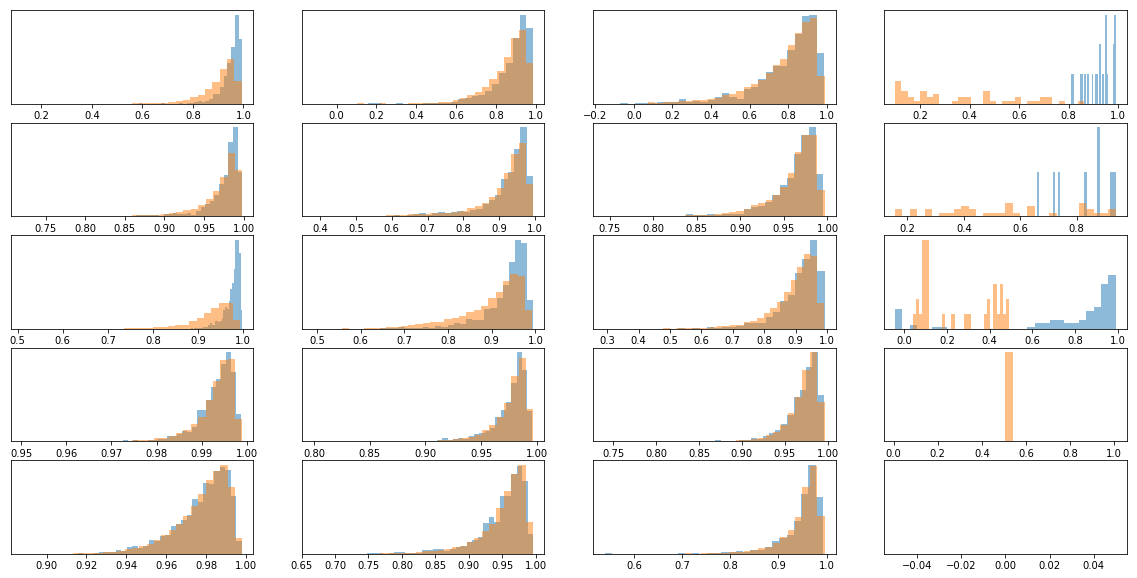

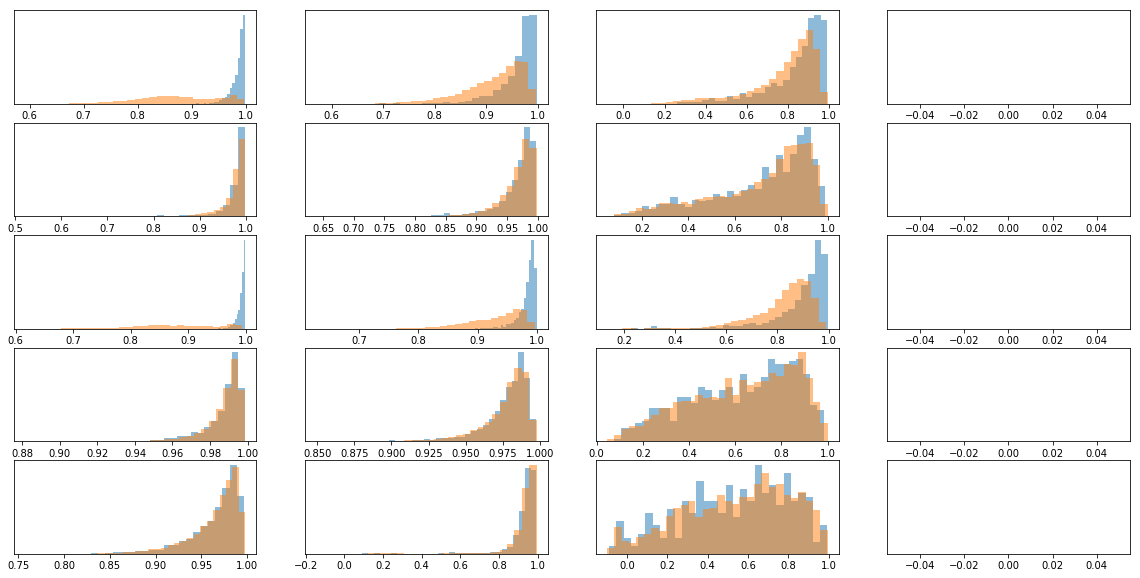

In [9]:
# type_labels = ['Orig', 'Full', 'Within', 'Across', 'AcrossWhole']
#plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
for betti in [0,1,2]:
    plotdat = []
    fig = plt.figure(figsize=(20,10))
    #print('\n\n')
    for ind, bird in enumerate(birds):
        
        #print('\n')
        plotdat=[]
        for ind2, tp in enumerate(stypes):
            in_stim, btwn_stim = bc_distrib_data[bird][betti][tp]
            in_stim = np.array(in_stim).flatten()
            btwn_stim = np.array(btwn_stim).flatten()
            in_stim = in_stim[~np.isnan(in_stim)]
            btwn_stim = btwn_stim[~np.isnan(btwn_stim)]
            #print(5*ind+ind2)
            ax = fig.add_subplot(5, 4, ind+4*ind2+1)
            
            ax.hist(in_stim, bins=30, alpha=0.5, density=True)
            ax.hist(btwn_stim, bins=30, alpha=0.5, density=True)
            ax.set_yticks([])
            
            #print(bc_distrib_data[bird][betti][tp])
    #plt.title('{} Betti {} Type {}'.format(bird, betti, tp))
    plt.savefig(figsavepth+'Betti{}-distrib.pdf'.format(betti))
#     plt.title('{} Betti {}'.format(bird, betti))

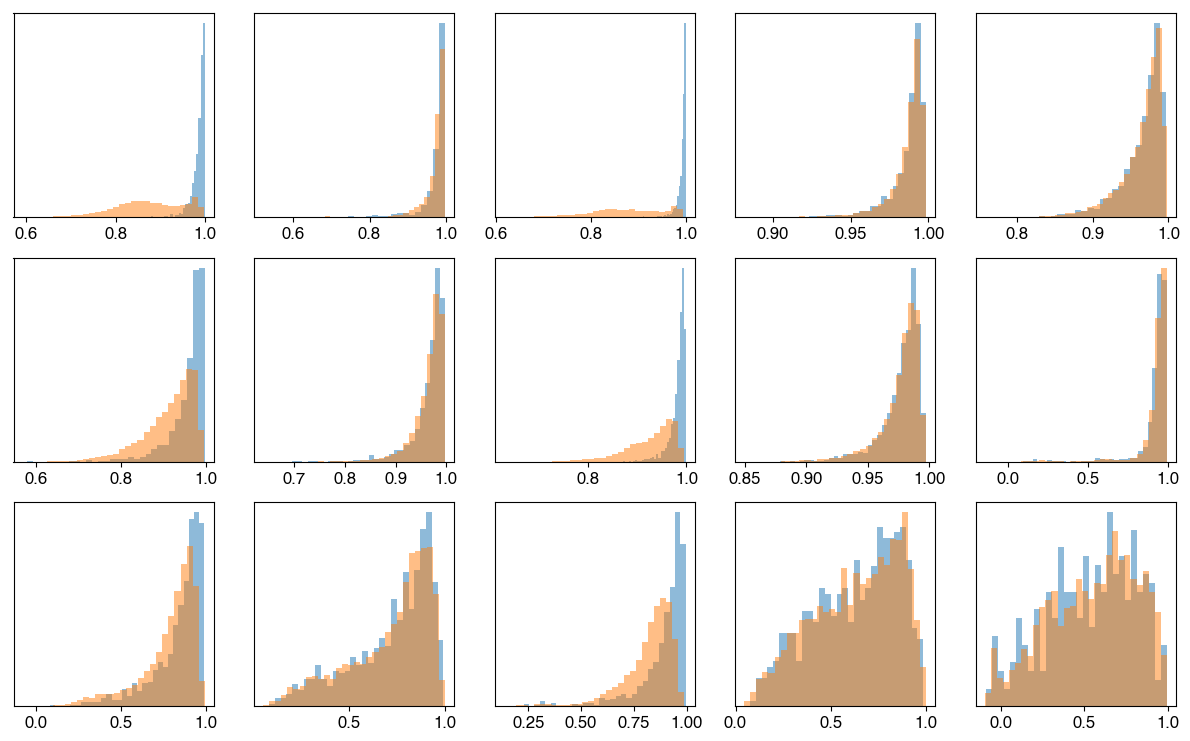

In [63]:
# type_labels = ['Orig', 'Full', 'Within', 'Across', 'AcrossWhole']
#plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
plt.style.use('default')
#bird_xlims=[0.6, 0.5, -0.12]
for betti in [2]:
    plotdat = []
    fig = plt.figure(figsize=(15, 9))
    #print('\n\n')
    for ind, bird in enumerate(birds[0:3]):
        bird_axs = []
        bird_min = 1.0
        
        #print('\n')
        plotdat=[]
        for ind2, tp in enumerate(stypes):
            in_stim, btwn_stim = bc_distrib_data[bird][betti][tp]
            in_stim = np.array(in_stim).flatten()
            btwn_stim = np.array(btwn_stim).flatten()
            in_stim = in_stim[~np.isnan(in_stim)]
            btwn_stim = btwn_stim[~np.isnan(btwn_stim)]
            #print(5*ind+ind2)
            ax = fig.add_subplot(3, 5, ind2+5*ind+1)
            
            ax.hist(in_stim, bins=30, alpha=0.5, density=True)
            ax.hist(btwn_stim, bins=30, alpha=0.5, density=True)
            ax.set_yticks([])
            for a in ax.get_xticklabels():
                a.set_fontname('Helvetica')
                a.set_fontsize(12)

            bird_axs.append(ax)
            hist_min = np.amin([np.amin(in_stim), np.amin(btwn_stim)])
            bird_min = np.amin([bird_min, hist_min])
        bird_min = bird_xlims[ind]

    plt.savefig(figsavepth+'BC_correlation_plot.pdf')

In [ ]:
np.arange()